In [ ]:
!pip install kaggle

In [ ]:
# configure the path to the kaggale.json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#importing the face mask data set from kaggle

In [ ]:
# api to fetch the dataset from the kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 162M/163M [00:01<00:00, 151MB/s]
100% 163M/163M [00:01<00:00, 161MB/s]


In [ ]:
# extracting the comoressed dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The Dataset is extracted!")

The Dataset is extracted!


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


#importing the dependices

In [ ]:
import os
import numpy as np # to conver the images into arrays
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # to visulaze the images and do some ploting stuffs
import cv2
from google.colab.patches import cv2_imshow # to display the image in the colab environment using cv2 we use patch
from PIL import  Image # used to read and images and do some processing
from sklearn.model_selection import train_test_split # to split our data into traing and testing

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1886.jpg', 'with_mask_2440.jpg', 'with_mask_2406.jpg', 'with_mask_3513.jpg', 'with_mask_256.jpg']
['with_mask_1661.jpg', 'with_mask_708.jpg', 'with_mask_941.jpg', 'with_mask_1273.jpg', 'with_mask_3466.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3293.jpg', 'without_mask_1836.jpg', 'without_mask_1826.jpg', 'without_mask_89.jpg', 'without_mask_874.jpg']
['without_mask_2242.jpg', 'without_mask_1138.jpg', 'without_mask_3712.jpg', 'without_mask_1554.jpg', 'without_mask_297.jpg']


In [ ]:
print("Number of with Mask images : ", len(with_mask_files))
print("Number of without Mask images : ", len(without_mask_files))

Number of with Mask images :  3725
Number of without Mask images :  3828


# Creating labels for the two class of images


if a person is wearing the mask we can label it as with_mask-->1

and without_mask ---> 0 like naming conventions

In [ ]:
# creating the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


#displaying the images

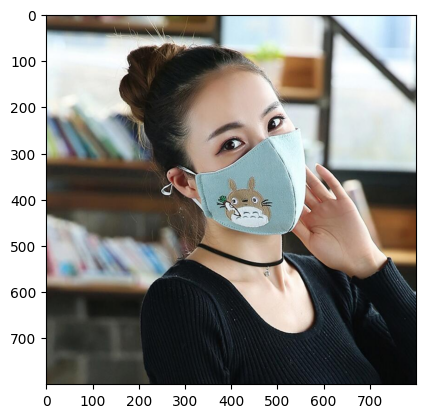

In [ ]:
# displaying the mask images
img = mpimg.imread('/content/data/with_mask/with_mask_3298.jpg')
imgplot = plt.imshow(img)
plt.show()

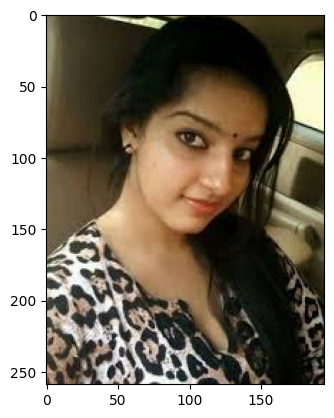

In [ ]:
# displaying the without mask images
img = mpimg.imread('/content/data/without_mask/without_mask_1973.jpg')
imgplot = plt.imshow(img)
plt.show()

#Image Processing

1. resize the image
2. Convert the images to numpy arrays

In [ ]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[ 36,  40,  43],
        [ 33,  37,  40],
        [ 34,  38,  41],
        ...,
        [ 72,  77,  80],
        [ 71,  76,  79],
        [ 70,  75,  78]],

       [[ 36,  40,  43],
        [ 34,  38,  41],
        [ 35,  39,  42],
        ...,
        [ 71,  76,  79],
        [ 71,  76,  79],
        [ 69,  74,  77]],

       [[ 37,  40,  45],
        [ 36,  39,  44],
        [ 37,  40,  45],
        ...,
        [ 70,  75,  78],
        [ 70,  75,  78],
        [ 69,  74,  77]],

       ...,

       [[217, 190, 173],
        [216, 189, 172],
        [218, 192, 175],
        ...,
        [255, 255, 255],
        [254, 254, 252],
        [253, 253, 251]],

       [[217, 191, 174],
        [218, 192, 175],
        [219, 193, 176],
        ...,
        [255, 255, 255],
        [254, 254, 252],
        [254, 254, 252]],

       [[218, 192, 175],
        [218, 192, 175],
        [214, 188, 171],
        ...,
        [255, 255, 255],
        [255, 255, 253],
        [254, 254, 252]]], dtype=uint8)
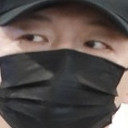

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# coverting the image list and label list to numpy arrays
X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


#training and testing the data

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)
 #traiing images will be stored in xtrain
#corresponding labels will be stored in ytrain
#same test images will be stored in x_text
#and corresponding y_test labels wll be stored in y_test

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
#Scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 44,  49,  54],
        [ 43,  48,  52],
        [ 43,  46,  51],
        ...,
        [250, 250, 250],
        [249, 249, 249],
        [250, 250, 250]],

       [[ 45,  50,  57],
        [ 44,  50,  54],
        [ 44,  47,  54],
        ...,
        [253, 252, 252],
        [249, 248, 248],
        [250, 250, 250]],

       [[ 47,  51,  60],
        [ 46,  50,  58],
        [ 44,  47,  56],
        ...,
        [252, 250, 251],
        [250, 248, 249],
        [251, 249, 250]],

       ...,

       [[154, 137, 125],
        [152, 134, 120],
        [150, 134, 118],
        ...,
        [246, 247, 249],
        [246, 248, 247],
        [246, 248, 247]],

       [[153, 137, 124],
        [149, 134, 118],
        [148, 132, 117],
        ...,
        [246, 247, 249],
        [246, 248, 247],
        [246, 248, 247]],

       [[153, 137, 124],
        [148, 132, 117],
        [147, 132, 116],
        ...,
        [244, 248, 249],
        [244, 248, 247],
        [244, 248, 247]]], dtype=uint8)
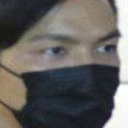

In [ ]:
X_train[0]


In [ ]:
X_train_scaled[0]

array([[[0.17254902, 0.19215686, 0.21176471],
        [0.16862745, 0.18823529, 0.20392157],
        [0.16862745, 0.18039216, 0.2       ],
        ...,
        [0.98039216, 0.98039216, 0.98039216],
        [0.97647059, 0.97647059, 0.97647059],
        [0.98039216, 0.98039216, 0.98039216]],

       [[0.17647059, 0.19607843, 0.22352941],
        [0.17254902, 0.19607843, 0.21176471],
        [0.17254902, 0.18431373, 0.21176471],
        ...,
        [0.99215686, 0.98823529, 0.98823529],
        [0.97647059, 0.97254902, 0.97254902],
        [0.98039216, 0.98039216, 0.98039216]],

       [[0.18431373, 0.2       , 0.23529412],
        [0.18039216, 0.19607843, 0.22745098],
        [0.17254902, 0.18431373, 0.21960784],
        ...,
        [0.98823529, 0.98039216, 0.98431373],
        [0.98039216, 0.97254902, 0.97647059],
        [0.98431373, 0.97647059, 0.98039216]],

       ...,

       [[0.60392157, 0.5372549 , 0.49019608],
        [0.59607843, 0.5254902 , 0.47058824],
        [0.58823529, 0

#building a Convolutinal nueral network(CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential() # here which we are going to stack our layer

model.add(keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu' , input_shape = (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2))) # adding convolational layer and maxpooling

model.add(keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2))) # similiarly we are creating same here

model.add(keras.layers.Flatten())# while passing  the 2d array that not accepts it accepts only single dimnsional
# so flattern takes the 2d array and flat the data into the single dimension in the form of vectors

model.add(keras.layers.Dense(128, activation = 'relu'))
#all the neurons in this layer is connected to the previous layer so the dense function is used

model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation = 'relu'))

model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation = 'sigmoid')) # number of nueron should be equal to the number of class



In [ ]:
# compile the nureal netwrok

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])


In [ ]:
#training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 135s 782ms/step - loss: 0.4394 - acc: 0.8113 - val_loss: 0.2809 - val_acc: 0.8826
Epoch 2/5
170/170 [==============================] - 128s 756ms/step - loss: 0.2689 - acc: 0.8902 - val_loss: 0.2679 - val_acc: 0.8860
Epoch 3/5
170/170 [==============================] - 126s 744ms/step - loss: 0.2448 - acc: 0.9009 - val_loss: 0.3029 - val_acc: 0.8545
Epoch 4/5
170/170 [==============================] - 124s 730ms/step - loss: 0.1937 - acc: 0.9251 - val_loss: 0.2703 - val_acc: 0.8959
Epoch 5/5
170/170 [==============================] - 130s 765ms/step - loss: 0.1455 - acc: 0.9421 - val_loss: 0.2624 - val_acc: 0.9041


#model evalauation

In [ ]:
loss ,accuracy = model.evaluate(X_test, Y_test)
print("Test accuracy : ", accuracy)

48/48 [==============================] - 9s 193ms/step - loss: 37.0052 - acc: 0.9007
Test accuracy :  0.9007279872894287


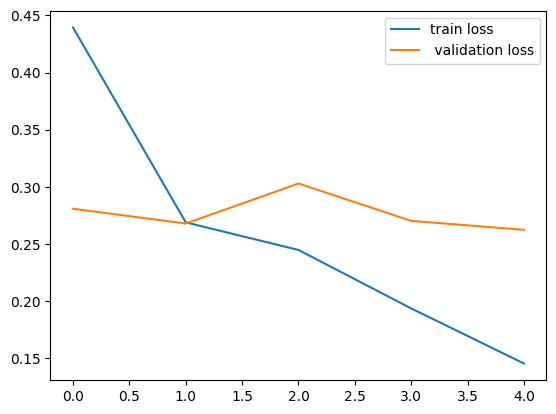

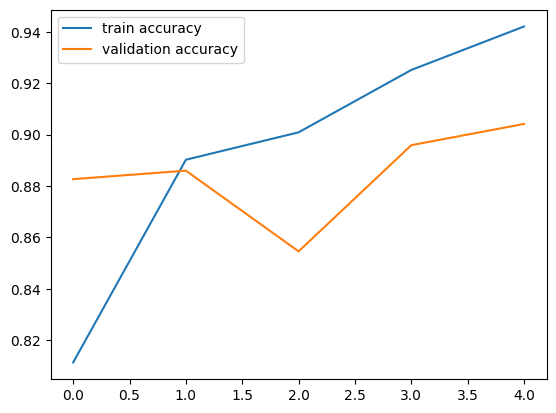

In [ ]:
h = history

#plot the loss values
plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label= " validation loss")
plt.legend()
plt.show()


#plot the accuracy values
plt.plot(h.history['acc'], label = 'train accuracy')
plt.plot(h.history['val_acc'], label= 'validation accuracy')
plt.legend()
plt.show()

# predictive system

path of the image to be predicted :/content/test3.jfif


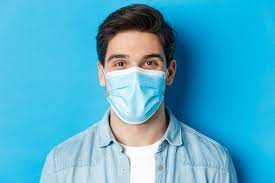

1/1 [==============================] - 0s 32ms/step
[[0.7649748  0.17557737]]
0
The person in the image is not wearing the Mask


In [ ]:
input_image_path = input('path of the image to be predicted :')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1, 128, 128, 3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing the Mask')

else:
  print('The person in the image is not wearing the Mask')




path of the image to be predicted :/content/test5.jfif


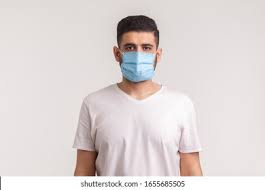

1/1 [==============================] - 0s 33ms/step
[[0.44790766 0.5578822 ]]
1
The person in the image is wearing the Mask


In [ ]:
input_image_path = input('path of the image to be predicted :')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1, 128, 128, 3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing the Mask')

else:
  print('The person in the image is not wearing the Mask')




path of the image to be predicted :/content/test7.jfif


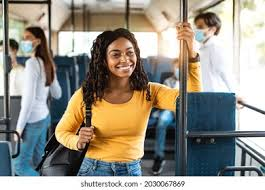

1/1 [==============================] - 0s 33ms/step
[[0.00156261 0.99862194]]
1
The person in the image is wearing the Mask


In [ ]:
input_image_path = input('path of the image to be predicted :')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1, 128, 128, 3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing the Mask')

else:
  print('The person in the image is not wearing the Mask')


